Building a Logistic Regression Classifier

In [1]:
#Read the train data
import pandas as pd

data_train = pd.read_csv('data_train.csv')
data_train = data_train.drop(['Unnamed: 0'], axis=1)

In [2]:
#Establish the parameters for GridSearch evaluation
from sklearn.grid_search import GridSearchCV
from sklearn.linear_model import LogisticRegression
import numpy as np

c_values = np.logspace(-30,20,5)
param_grid = {'C': c_values, 'penalty': ['l1','l2'], 'dual': [False], 'solver': ['liblinear']}
grid_search = GridSearchCV(LogisticRegression(), param_grid, scoring = 'roc_auc', verbose = 3)
grid_search.fit(data_train.drop('Y', axis=1), data_train.Y)

Fitting 3 folds for each of 10 candidates, totalling 30 fits
[CV] penalty=l1, C=1e-30, dual=False, solver=liblinear ...............
[CV]  penalty=l1, C=1e-30, dual=False, solver=liblinear, score=0.500000 -   1.5s
[CV] penalty=l1, C=1e-30, dual=False, solver=liblinear ...............
[CV]  penalty=l1, C=1e-30, dual=False, solver=liblinear, score=0.500000 -   1.2s
[CV] penalty=l1, C=1e-30, dual=False, solver=liblinear ...............
[CV]  penalty=l1, C=1e-30, dual=False, solver=liblinear, score=0.500000 -   1.1s
[CV] penalty=l2, C=1e-30, dual=False, solver=liblinear ...............
[CV]  penalty=l2, C=1e-30, dual=False, solver=liblinear, score=0.500000 -   1.0s
[CV] penalty=l2, C=1e-30, dual=False, solver=liblinear ...............
[CV]  penalty=l2, C=1e-30, dual=False, solver=liblinear, score=0.500000 -   1.4s
[CV] penalty=l2, C=1e-30, dual=False, solver=liblinear ...............
[CV]  penalty=l2, C=1e-30, dual=False, solver=liblinear, score=0.500000 -   1.0s
[CV] penalty=l1, C=3.162277

[Parallel(n_jobs=1)]: Done   1 jobs       | elapsed:    1.6s
[Parallel(n_jobs=1)]: Done  30 out of  30 | elapsed:  5.9min finished


GridSearchCV(cv=None, error_score='raise',
       estimator=LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr',
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0),
       fit_params={}, iid=True, loss_func=None, n_jobs=1,
       param_grid={'penalty': ['l1', 'l2'], 'C': array([  1.00000e-30,   3.16228e-18,   1.00000e-05,   3.16228e+07,
         1.00000e+20]), 'dual': [False], 'solver': ['liblinear']},
       pre_dispatch='2*n_jobs', refit=True, score_func=None,
       scoring='roc_auc', verbose=3)

In [3]:
#Read the validation data 
data_validation = pd.read_csv('data_validation.csv')
data_validation = data_validation.drop(['Unnamed: 0'], axis=1)

In [4]:
#Apply GridSearch to validation data and compute score
from sklearn.metrics import roc_auc_score

grid_search.predict_proba(data_validation.drop('Y', axis=1))
grid_search.score(data_validation.drop('Y', axis=1), data_validation.Y)
#auc_score = roc_auc_score(data_validation.Y, logreg.predict_proba(data_validation.drop('Y', axis=1))[:, 1])


/Users/Rafa/anaconda2/lib/python2.7/site-packages/sklearn/grid_search.py:370: ChangedBehaviorWarning: The long-standing behavior to use the estimator's score function in GridSearchCV.score has changed. The scoring parameter is now used.
  ChangedBehaviorWarning)


0.7786002944645295

In [5]:
#Extract the best parameters from GridSearch
grid_search.best_params_

{'C': 1e+20, 'dual': False, 'penalty': 'l2', 'solver': 'liblinear'}

In [6]:
#Build function to plot ROC curve
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt 
%matplotlib inline

def plotAUC(truth, pred, lab):
    fpr, tpr, thresholds = roc_curve(truth, pred)
    roc_auc = auc(fpr, tpr)
    c = (np.random.rand(), np.random.rand(), np.random.rand())
    plt.plot(fpr, tpr, color=c, label= lab+' (AUC = %0.2f)' % roc_auc)
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.0])
    plt.xlabel('FPR')
    plt.ylabel('TPR')
    plt.title('ROC')
    plt.legend(loc="lower right")

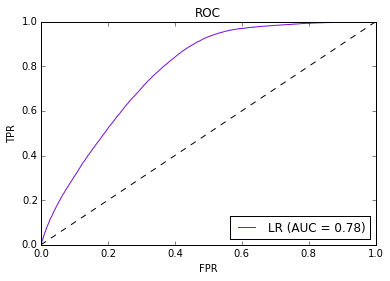

In [7]:
#Apply classifier having the best parameters on validation data and plot ROC curve
logreg = LogisticRegression(C=0.39069399370546209, dual=False, penalty='l2', solver='liblinear')
logreg.fit(data_train.drop('Y', axis=1), data_train.Y)

plotAUC(data_validation.Y, logreg.predict_proba(data_validation.drop('Y', axis=1))[:,1], 'LR')    
plt.show()

In [ ]:
datae = data_train.corr() > .2

In [ ]:
datae